# My notebook for playing with tensorflow

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import integrate
from IPython import display
import sklearn as skl
%matplotlib inline

#### code to print 10 random integers from 1 to 10 all squared in tensorflow

In [2]:
#make up some random data in a numpy array
data = np.random.randint(1,10, size=10)

#x is a constant with the values of data
x = tf.constant(data)
#y is a variable with the value x^2
y = tf.Variable(x**2)

#initialize all vairables is when it first runs the lines of the variable above
model = tf.global_variables_initializer()

#run session, session is needed as this is when it actually completes the commands
with tf.Session() as sess:
    #run the global variable initializer
    sess.run(model)
    #print y from in the session
    print(sess.run(y))

[ 1 36 36  1 36  9  9 81  1 36]


#### code for tensorflow loop where each loop $(x+1)^2$

In [19]:
#set up x and y as variables witt value 0
x = tf.Variable(0)
y = tf.Variable(0)

#set model to initialize variables
model = tf.global_variables_initializer()

#run session
with tf.Session() as sess:
    
    #run the global variables  initializer
    sess.run(model)
    
    #loop 5 times within session
    for i in range(5):
    
        #update values of x and y
        x += 1
        y = x**2
        
        #print y
        print(sess.run(y))

1
4
9
16
25


#### tensorfow loop where it creates random value and prints out  ann updated average of the random digits

In [17]:
#set up tensorflow variables to 0
num = tf.Variable(0)
ave = tf.Variable(0)
tot = tf.Variable(0)

#set model to initialize variables
model = tf.global_variables_initializer()

#run session
with tf.Session() as sess:
    
    #initialize variables
    sess.run(model)
    
    #loop 5 times
    for i in range(5):
        
        #calculate and  set variables values
        num += 1
        ran = np.random.randint(1000)
        tot = tot+ran
        average = tot/num
        
        #print average
        print(sess.run(average))

465
621
691
578
644


#### uses tensorboard and logs the data in /home/logdir

In [4]:
#define variables
x = tf.constant(35)
y = tf.Variable(x + 5)

#variable initializer
model =  tf.global_variables_initializer()

#run session
with tf.Session() as sess:
    
    #using tensorboard,writing to directory /home/logdir
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/home/logdir", sess.graph)

    #run the model and print output
    sess.run(model)
    print(sess.run(y))

40


In [3]:
#x is a place holder, 3 is the number of values ofthe  placeholder
x = tf.placeholder("float", 3)
y = x ** 2

#run session
with tf.Session() as sess:
    #result equals y with x being given the values of 1, 2 and 3
    result = sess.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 1.  4.  9.]


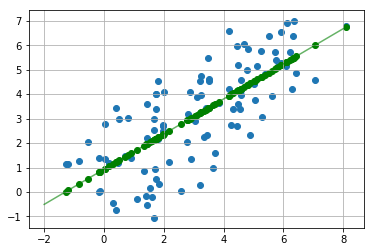

y = [ 0.71826541] x + [ 0.92933142]


In [12]:
# number of of points on the graph
num_examples = 100

# make arrays x and y with random noise added to them
# with the x values from 0-6 and y values form 4-16 without noise
X = np.array([np.linspace(0, 6, num_examples), np.linspace(0, 6, num_examples)])
X += np.random.randn(2, num_examples)
x, y = X

# create array with shape 2 by a with first value equaling 1
# these are basically the m and c from y = mx+ c
x_with_bias = np.array([(1., a) for a in x]).astype(np.float32)

# create loss tracker and set  parameters
losses = []
training_steps = 5000
learning_rate = 0.001

# start session
with tf.Session() as sess:
    
    # set tensorflow values using variable from before
    # input is the x values to be put into the equation
    # target is the y values in the equation
    input = tf.constant(x_with_bias)
    target = tf.constant(np.transpose([y]).astype(np.float32))
    
    # weights are set random at first in a 1 by 2 array
    weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))

    # initialize variables
    tf.global_variables_initializer().run()

    # yhat is the output of function mx + c by multiplying the matrices input(1's and x values) and weights(m and c)
    yhat = tf.matmul(input, weights)
    # find error by subtracting target from output of equation
    yerror = tf.subtract(yhat, target)
    # to minimize L2 loss. This is the sum of all the squared errors.
    # it effects larger errors a lot more than small errors
    loss = tf.nn.l2_loss(yerror)
  
    # using gradient descent to update weights, weights += grads * learning_rate
    # using the partial derivative of the loss to decrease the error
    # by finding which direction to move the weights
    update_weights = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
  
    # loop number of training steps and run update weights
    for _ in range(training_steps):
        update_weights.run()
        # append to losses array
        losses.append(loss.eval())

    # get final values from the session
    betas = weights.eval()
    yhat = yhat.eval()

# plot the random points
plt.scatter(x, y)
# plot the random x values with the new y values
plt.scatter(x, np.transpose(yhat)[0], c="g")
# set line x range and plot the line
line_x_range = (-2, 8)
plt.plot(line_x_range, [betas[0] + a * betas[1] for a in line_x_range], "g", alpha=0.6)
plt.grid(True)
plt.show()
print 'y =',betas[1],'x +',betas[0]

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]] [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]] [[ -0.  -2.  -4.  -6.  -8. -10. -12. -14. -16. -18.]
 [ -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.]]


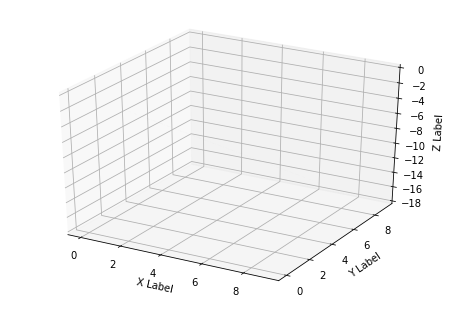

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)

#y = x = np.array([np.linspace(0,10,21), np.linspace(0,10,21)])
y = x = np.array([np.arange(0, 10, 1), np.ones(10)])
z = -2*x

ax.plot_surface(x, y, z)

print x, y, z
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

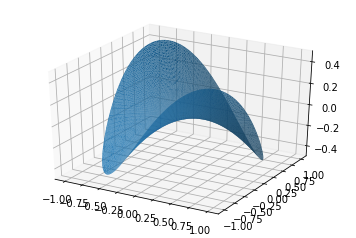

In [24]:
n_radii = 64
n_angles = 128

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()
